In [2]:
import pytesseract as T
from PIL import Image
import pandas

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches


from sklearn import datasets

%matplotlib inline


# Load Images

Image shape:  (584, 212)


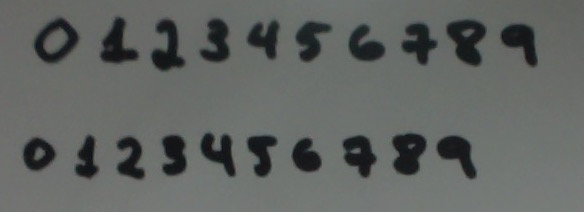

In [145]:
fname = '/Users/ciodaro/Desktop/numbers_6.jpg'
img = Image.open(fname)
print('Image shape: ', img.size)
img

# Preprocessed Image

Reshaped From:  (584, 212)
           to:  (550, 200)
ARRAY LIkE [[100 101 101 ...,  96  98  98]
 [101 101 101 ...,  96  97  98]
 [101 101 101 ...,  95  97  97]
 ..., 
 [114 114 114 ..., 122 122 122]
 [115 115 115 ..., 122 122 122]
 [116 115 115 ..., 122 122 122]]


([], <a list of 0 Text yticklabel objects>)

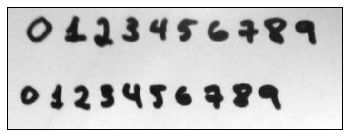

In [146]:
th = 500
ny = 200

if ny is None:
    ny = img.size[1]
nx = int(img.size[0] / float(img.size[1]) * ny)

print('Reshaped From: ', img.size)
print('           to: ', (nx,ny))

prep_img = img.resize((nx,ny)).copy()
prep_img = np.asarray(prep_img.convert('L')).copy()
prep_img[prep_img > th] = 0

print('ARRAY LIkE', prep_img)

plt.imshow(prep_img, cmap='gray')
plt.xticks([])
plt.yticks([])

# Tesseract

-c tessedit_char_whitelist=0123456789 --oem 0
[['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'], ['1', '1', '0', '0', '0', '0', '0', '0', '550', '200', '-1', ''], ['2', '1', '1', '0', '0', '0', '22', '16', '485', '153', '-1', ''], ['3', '1', '1', '1', '0', '0', '22', '16', '485', '153', '-1', ''], ['4', '1', '1', '1', '1', '0', '32', '16', '475', '51', '-1', ''], ['5', '1', '1', '1', '1', '1', '32', '16', '475', '51', '7', '0 13476 071'], ['4', '1', '1', '1', '2', '0', '22', '125', '426', '44', '-1', ''], ['5', '1', '1', '1', '2', '1', '22', '125', '426', '44', '8', '0423 416 8']]
TESTE DE BLOCOS
	Number of rows from tesseract (9) > 2
TESTE DE LINHAS
	Number of lines (2) == 3
	=> False
TESTE DE TOTAL
	Total number of characters == 20
['0 13476 071' '0423 416 8']


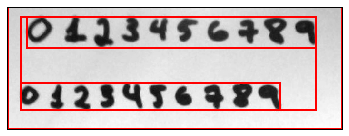

In [147]:
charlist='0123456789'

tess_conf = {
    #'textord_words_default_nonspace': '10',
    'tessedit_char_whitelist': charlist,
    #'min_sane_x_ht_pixels': '1',
    #'edges_min_nonhole': '100'
}
tess_conf_str = ' '.join(['-c '+k+'='+v for k,v in tess_conf.items()])
tess_conf_str = tess_conf_str + ' --oem 0'
print(tess_conf_str)


no_rows = 3
min_blocks = 2
no_blocks = 20
x = [row.split('\t') for row in T.image_to_data(prep_img, config=tess_conf_str).split('\n')]
print(x)
print('TESTE DE BLOCOS')
print('\tNumber of rows from tesseract (%i) > %i'%(len(x)+1, min_blocks))
if not (len(x)+1 > min_blocks):
    raise Exception("found only one block in one row! (%i)"%len(x))

df = pandas.DataFrame(data=x[1:], columns=x[0])

print('TESTE DE LINHAS')
print('\tNumber of lines (%i) == %i'%(df.line_num.astype(int).max(), no_rows))
print('\t=>', df.line_num.astype(int).max() == no_rows)

print('TESTE DE TOTAL')
print('\tTotal number of characters == %i'%no_blocks)




# Draw boxes
plt.imshow(prep_img, cmap='gray')
for i, row in df.iterrows():
    #if float(row.conf) <= 0: continue
    r = patches.Rectangle((row.left, row.top), row.width, row.height, color='r', fill=False, lw=2)
    plt.gca().add_artist(r)
plt.xticks([])
plt.yticks([])

print(df.text[df.text != ''].values)



In [31]:
df.line_num.astype(int).max()

3

In [42]:
df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,232,100,-1,
1,2,1,1,0,0,0,5,5,214,86,-1,
2,3,1,1,1,0,0,5,5,214,86,-1,
3,4,1,1,1,1,0,8,5,204,21,-1,
4,5,1,1,1,1,1,8,5,147,21,60,001111
5,5,1,1,1,1,2,177,8,35,17,65,35
6,4,1,1,1,2,0,5,36,214,24,-1,
7,5,1,1,1,2,1,5,36,146,24,7,4 15 66
8,5,1,1,1,2,2,175,37,44,18,42,33
9,4,1,1,1,3,0,6,71,109,20,-1,


In [5]:
# find correct number of rows and characters, adjusting tesseract conf
min_sane_x_ht_pixels = 1


charlist='0123456789'
charlist = charlist + charlist.upper()
tess_conf = '-c tessedit_char_whitelist='+charlist
#tess_conf = tess_conf + ' -c min_sane_x_ht_pixels=%i'%min_sane_x_ht_pixels
print(tess_conf)



min_split = 4
x = [row.split('\t') for row in T.image_to_data(bw_img, config=tess_conf).split('\n')]
print('Testing: len(x) >= %i'%min_split)
print(len(x))
print(len(x)>=min_split)
print(x)

-c tessedit_char_whitelist=01234567890123456789
Testing: len(x) >= 4
2
False
[['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'], ['1', '1', '0', '0', '0', '0', '0', '0', '2062', '885', '-1']]


In [42]:
img.size

(2062, 885)

In [31]:
charlist='0123456789'
charlist = charlist + charlist.upper()

tess_conf = '-c tessedit_char_whitelist='+charlist

tess_conf = tess_conf + 'min_sane_x_ht_pixels=8'


x = [row.split('\t') for row in T.image_to_data(bw_img, config=tess_conf).split('\n')]
df = pandas.DataFrame(data=x[1:], columns=x[0])

plt.imshow(bw_img, cmap='gray')
for i, row in df.iterrows():
    if float(row.conf) <= 0: continue
    r = patches.Rectangle((row.left, row.top), row.width, row.height, color='r', fill=False, lw=2)
    plt.gca().add_artist(r)
plt.xticks([])
plt.yticks([])

print(df.text[df.text != ''].values)

AssertionError: 12 columns passed, passed data had 11 columns

In [62]:
th = 220
bw_img = np.asarray(img.convert('L')).copy()

bw_img[bw_img > th] = 0

charlist='0123456789abcdefghijklmnopqrstuvxwyz'
charlist = charlist + charlist.upper()

#tess_conf = '-c tessedit_char_whitelist='+charlist

x = [row.split('\t') for row in T.image_to_data(bw_img, config=tess_conf).split('\n')]
df = pandas.DataFrame(data=x[1:], columns=x[0])

plt.imshow(bw_img, cmap='gray')
for i, row in df.iterrows():
    if float(row.conf) <= 0: continue
    r = patches.Rectangle((row.left, row.top), row.width, row.height, color='r', fill=False, lw=10)
    plt.gca().add_artist(r)
plt.xticks([])
plt.yticks([])

print(df.text[df.text != ''].values)

AssertionError: 12 columns passed, passed data had 11 columns